<a href="https://colab.research.google.com/github/nyp-sit/it3103/blob/main/week3/convnets_with_small_datasets-solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise: Image Classification using Convolutional Neural Network 

In this practical, we will see how we can use a Convolutional Neural Network to classify cat and dog images.

We will train the network using relatively little data (about 2000 images) which is a common real problem with a lot of deep learning projects where data is hard to come by. We have learnt in the lecture how we can solve the small data problem with some common techniques like data augmentation and transfer learning. We will examine how to use data augmentation in this lab and in the next lab, we will learn to use transfer learning.  

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras


## Downloading the data

The cats vs. dogs dataset is available at Kaggle.com as part of a computer vision 
competition in late 2013. You can download the [original dataset](
https://www.kaggle.com/c/dogs-vs-cats/data) from Kaggle (you will need to create a Kaggle account if you don't already have one)

The pictures are medium-resolution color JPEGs and are of various sizes and shapes that look like this:

<img src='https://sdaai-public.s3-ap-southeast-1.amazonaws.com/it3103/images/cats_vs_dogs_samples.jpeg' height='300'/>

This original dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543MB large (compressed). For the purpose of demonstrating challenges of training with small data set and also to have an opportunity to see the effects of using data augmentation technique, we will use a smaller subset (2000 train images and 1000 validation images) which you can download from [here](https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/cats_and_dogs_filtered.zip). 

In the codes below, we use the keras ``get_file()`` utility to download and unzip the dataset.

In [ ]:
import os, shutil

In [ ]:
dataset_URL = 'https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_URL, extract=True, cache_dir='.')
print(path_to_zip)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')



In [ ]:
# Directories for our training,
# train and validation splits
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

In [ ]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

In [ ]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

In [ ]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))


So we have indeed 2000 training images, and then 1000 validation images. In each split, there is the same number of 
samples from each class: this is a balanced binary classification problem, which means that classification accuracy will be an appropriate 
measure of success.

## Building our network

Our convnet will be a stack of alternated `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

**Exercise 1**: 

Write the codes to implement the following: 

- Input layer should be of shape (150,150,3)
- The hidden layers consist of the following Conv2D/MaxPooling2D blocks:
  - Block 1: Conv layer with 32 filters with filter size of 3x3, followed by MaxPooling layer
  - Block 2: Conv layer with 64 filters with filter size of 3x3, followed by MaxPooling layer
  - Block 3/4: Conv layer with 128 filters with filter size of 3x3, followed by MaxPooling layer
  - a layer to convert 2D to 1D 
  - a Dropout layer to help to reduce overfitting
- a Dense Layer as the output layer

Use RELU as activation functions for all hidden layers. 

What activation function should you use for the output layer?

<br/>

<details>
<summary>Click here for answer</summary>

```
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

```
</details>

In [ ]:
### TODO: Write the code to build the model and compile the model 


from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
 

Let's print the model summary to show the shape and paramater numbers for each layer. Your output should look something like this: 

<img src="https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/resources/expected_convnet_summary.png" width=400 />

In [ ]:
model.summary()

**Exercise 2**: 

Compile your model with the appropriate optimizer and loss function. We will use RMSProp with learning rate of 1e-4 and monitor the 'accuracy' metrics. What should we use for the loss function? 

Complete the code below. 

<br/>
<details>
<summary>Click here for answer</summary>

```
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
```
</details>

In [ ]:
from tensorflow.keras import optimizers

### TODO: Complete the code below ####
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## Data preprocessing

Image data should be formatted into appropriately pre-processed floating point tensors before being fed into our 
network. Currently, our data sits on a drive as JPEG files, so the steps for getting it into our network are roughly:

* Read the picture files.
* Decode the JPEG content to RGB grids of pixels.
* Resize the image into same size (in our case, we will use 150 by 150)
* Convert these into floating point tensors.
* Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

It may seem a bit daunting, but tf.keras provides the class `ImageDataGenerator` which allows to 
quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
# 255 * 1/255 = (255X1)/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Let's take a look at the output of one of these generators: it yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary 
labels (shape `(20,)`). 20 is the number of samples in each batch (the batch size). Note that the generator yields these batches 
indefinitely: it just loops endlessly over the images present in the target folder. For this reason, we need to `break` the iteration loop 
at some point.

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [ ]:
labels_batch[:10]

array([0., 0., 1., 1., 1., 1., 1., 0., 1., 0.], dtype=float32)

In [ ]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

How do we know what label is assigned to each of the class? We can use class_indices of the ImageGenerator to show the mapping.

In [ ]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

## Train the Model

Let's fit our model to the data using the generator. It expects as first argument a Python generator that will yield batches of inputs and targets indefinitely, like ours does. 
Because the data is being generated endlessly, the generator needs to know how many samples to draw from the generator before 
declaring an epoch over. This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the 
generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. In our case, 
batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples.

When using `fit`, one may pass a `validation_data`.Importantly, this argument is 
allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. If you pass a generator as `validation_data`, then 
this generator is expected to yield batches of validation data endlessly, and thus you should also specify the `validation_steps` argument, 
which tells the process how many batches to draw from the validation generator for evaluation.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

It is good practice to always save your models after training:

In [ ]:
model.save('cats_and_dogs_small_1')

INFO:tensorflow:Assets written to: cats_and_dogs_small_1/assets


Let's plot the loss and accuracy of the model over the training and validation data during training:

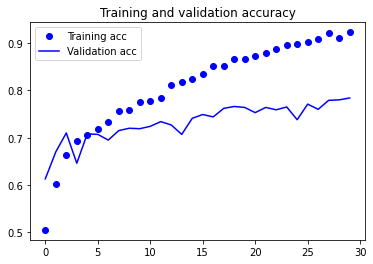

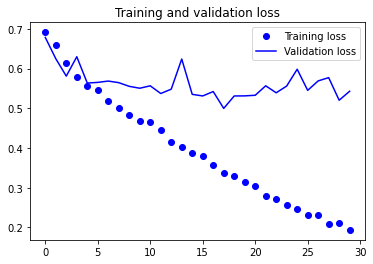

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic of overfitting. Our training accuracy increases linearly over time, until it reaches nearly 100%, while our 
validation accuracy stalls at 70-72%. Our validation loss reaches its minimum after only five epochs then stalls, while the training loss 
keeps decreasing linearly until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. There are a 
number of techniques that can help mitigate overfitting, such as dropout and weight decay (L2 regularization). We are now going to 
use one, specific to computer vision, and used almost universally when processing images with deep learning models: *data 
augmentation*.

## Using data augmentation

Overfitting is caused by having too few samples to learn from, rendering us unable to train a model able to generalize to new data. 
Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data 
augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number 
of random transformations that yield believable-looking images. The goal is that at training time, our model would never see the exact same 
picture twice. This helps the model get exposed to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our `ImageDataGenerator` 
instance. Let's get started with an example:

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more, see the Keras documentation). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures 
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal 
asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

Let's take a look at our augmented images:

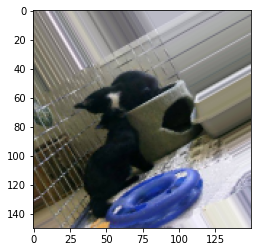

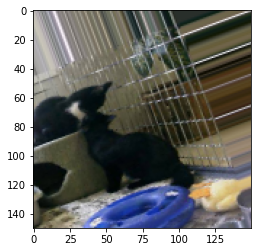

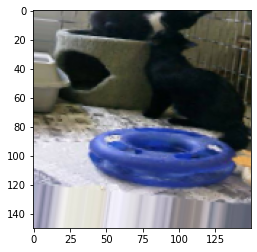

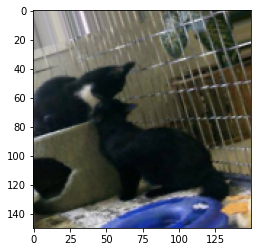

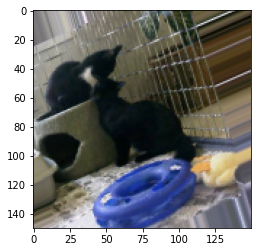

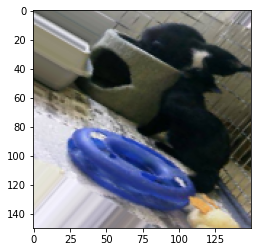

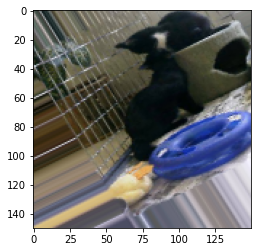

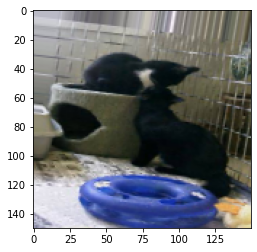

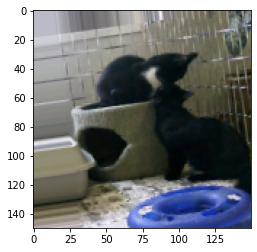

In [ ]:
# This is module with image preprocessing utilities
from tensorflow.keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# We pick one image to "augment"
img_path = fnames[3]

# Read the image and resize it
img = image.load_img(img_path, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command below generates batches of randomly transformed images.
# It will loop indefinitely, so we need to `break` the loop at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 9 == 0:
        break

plt.show()

If we train a new network using this data augmentation configuration, our network will never see twice the same input. However, the inputs 
that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, 
we can only remix existing information. As such, this might not be quite enough to completely get rid of overfitting. To further fight 
overfitting, we will also add a Dropout layer to our model, right before the densely-connected classifier:

**Exercise 3:**

Modify your model to include the Dropout layer, using 50% dropout. 

<br/>
<details>
<summary>Click here for answer</summary>

```
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
```
</details>

In [ ]:
## TODO: create a new model with the Dropout layer ##

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
 
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Let's train our network using data augmentation and dropout:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Let's save our model -- we will be using it in the section on convnet visualization.

In [ ]:
model.save('cats_and_dogs_small_2')

INFO:tensorflow:Assets written to: cats_and_dogs_small_2/assets


Let's plot our results again:

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, we are no longer overfitting: the training curves are rather closely tracking the validation 
curves. We are now able to reach an accuracy of 82%, a 15% relative improvement over the non-regularized model.

By leveraging regularization techniques even further and by tuning the network's parameters (such as the number of filters per convolution 
layer, or the number of layers in the network), we may be able to get an even better accuracy, likely up to 86-87%. However, it would prove 
very difficult to go any higher just by training our own convnet from scratch, simply because we have so little data to work with. As a 
next step to improve our accuracy on this problem, we will have to leverage a pre-trained model, which will be the focus of the next two 
sections.

## Test with our own image

Now we are ready to put our trained model to test! 
You can upload any cat and dog image from your local computer using the code below.  The upload file will then be pre-processed into image tensor before feeding into our model for prediction.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

In [ ]:
# We need to pre-process our image to the shape expected by our model 

img = keras.preprocessing.image.load_img(
    fn, target_size=(150, 150)
)

# we convert the image to numpy array
img_array = keras.preprocessing.image.img_to_array(img)

# Although we only have single image, however our model expected data in batches
# so we will need to add in the batch axis too
img_array = tf.expand_dims(img_array, 0) # Create a batch

# we load the model saved earlier and do the inference 
model = tf.keras.models.load_model('cats_and_dogs_small_2')
predictions = model(img_array)
if predictions[0] > 0.5: 
    print('It is a dog')
else:
    print('It is a cat')

## Additional Exercise (Multi-class Image Classification)

Now that you have learnt how to train a model to do binary image classification of cats and dogs using Convolutional Neural Network. 

Modify the code to train a model to recognise whether a hand gesture is one of the gesture in the rock, paper and scissor game. 

The dataset of rock paper scissor can be downloaded from https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/rps2.zip



In [21]:
## TODO: Complete you code here to download the rock paper scissor image dataset, pre-process, train and evaluate ##
import os 
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_URL = 'https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/datasets/rps2.zip'
path_to_zip = tf.keras.utils.get_file('rps2.zip', origin=dataset_URL, extract=True, cache_dir='.')
print(path_to_zip)
PATH = os.path.join(os.path.dirname(path_to_zip), 'rps2')


230342656/230335488 [==============================] - 18s 0us/step
./datasets/rps2.zip


In [3]:
print(PATH)

./datasets/rps2


In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [27]:
# All images will be rescaled by 1./255
# 255 * 1/255 = (255X1)/255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # since our dataset has more than 3 classes, we will choose either categorical or sparse categorical
        # this must match with the loss function we choose in our model
        class_mode='sparse')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='sparse')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


You can see the labels is **NOT** one-hot-encoded.  Try changing the class_mode to 'categorical' and observe that the label will be one-hot-encoded.

In [29]:
labels_batch[:1]

array([1.], dtype=float32)

In [30]:
train_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [10]:
history = model.fit(
      train_generator,
      steps_per_epoch=126,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=18)

Epoch 1/30
126/126 [==============================] - 43s 101ms/step - loss: 0.8734 - acc: 0.5980 - val_loss: 0.6178 - val_acc: 0.7639
Epoch 2/30
126/126 [==============================] - 12s 99ms/step - loss: 0.1693 - acc: 0.9486 - val_loss: 0.3928 - val_acc: 0.8722
Epoch 3/30
126/126 [==============================] - 12s 98ms/step - loss: 0.0324 - acc: 0.9922 - val_loss: 0.3901 - val_acc: 0.9111
Epoch 4/30
126/126 [==============================] - 12s 98ms/step - loss: 0.0117 - acc: 0.9961 - val_loss: 0.5478 - val_acc: 0.8944
Epoch 5/30
126/126 [==============================] - 12s 99ms/step - loss: 0.0044 - acc: 0.9985 - val_loss: 0.5108 - val_acc: 0.8917
Epoch 6/30
126/126 [==============================] - 12s 98ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.7432 - val_acc: 0.8722
Epoch 7/30
126/126 [==============================] - 12s 99ms/step - loss: 0.0036 - acc: 0.9993 - val_loss: 0.7205 - val_acc: 0.9056
Epoch 8/30
126/126 [==============================] - 12s 99m

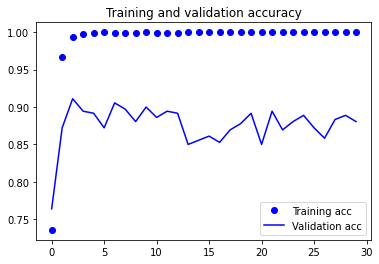

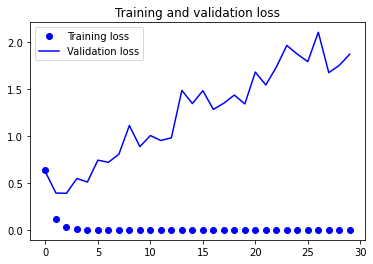

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
model.save("rps_model")

INFO:tensorflow:Assets written to: rps_model/assets


In [13]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


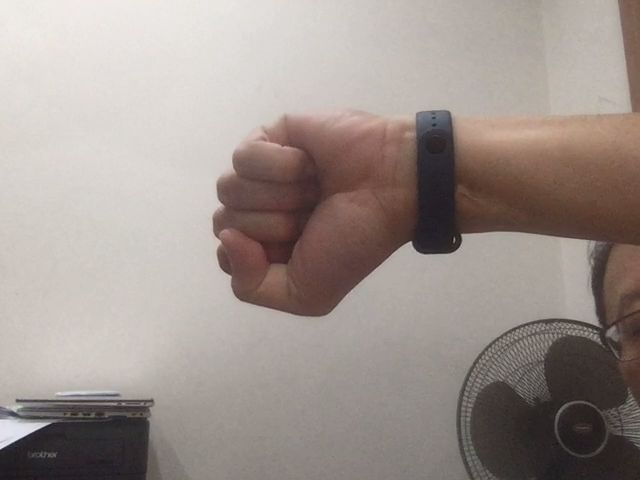

In [31]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
filename = 'datasets/rps2/validation/paper/testpaper01-12.png'

In [34]:
img = keras.preprocessing.image.load_img(
    filename, target_size=(150, 150)
)

# we convert the image to numpy array
img_array = keras.preprocessing.image.img_to_array(img)

# Although we only have single image, however our model expected data in batches
# so we will need to add in the batch axis too
img_array = tf.expand_dims(img_array, 0) # Create a batch

# we load the model saved earlier and do the inference 
model = tf.keras.models.load_model('rps_model')
predicted_label = model.predict(img_array)
# or predicted_label = model(img_array)

print(predicted_label)

[[0. 1. 0.]]


In [17]:
print(train_generator.class_indices)

{'paper': 0, 'rock': 1, 'scissors': 2}
